In [175]:
import sys
sys.path.append('C:\Anaconda3\Lib\site-packages')

import requests
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='whitegrid', context='notebook')
# sns.reset_orig()

import pandas as pd
import numpy as np
import scipy as sp

### Get top functions from Robert Kozikowski's blog post (July 2016)
For more information on how these were determined you can check out the post where he details the SQL query used to pull the data.

In [8]:
url = requests.get('https://kozikow.com/2016/07/01/top-pandas-functions-used-in-github-repos/#Top-numpy-functions-and-modules')
soup = BeautifulSoup(url.text, 'html.parser')

In [21]:
tablehtml = soup.find_all('tr')

In [148]:
# e.g.
tablehtml[68].text.split()

['stats',
 '2281',
 '5717',
 'https://github.com/geophysics/mtpy/blob/master/mtpy/modeling/occam2d.py']

In [149]:
top_func_pd, counts_distinct_pd, counts_total_pd = [], [], []
for i in range(20):
    start = 1
    x = tablehtml[start+i].text.split()
    top_func_pd.append(x[0])
    counts_distinct_pd.append(int(x[1]))
    counts_total_pd.append(int(x[2]))
    
top_func_pd_df, counts_distinct_pd_df = [], []
for i in range(20):
    start = 23
    x = tablehtml[start+i].text.split()
    top_func_pd_df.append(x[0])
    counts_distinct_pd_df.append(int(x[1]))
    
top_func_np, counts_distinct_np, counts_total_np = [], [], []
for i in range(20):
    start = 46
    x = tablehtml[start+i].text.split()
    top_func_np.append(x[0])
    counts_distinct_np.append(int(x[1]))
    counts_total_np.append(int(x[2]))
    
top_func_sp, counts_distinct_sp, counts_total_sp = [], [], []
for i in range(20):
    start = 68
    x = tablehtml[start+i].text.split()
    top_func_sp.append(x[0])
    counts_distinct_sp.append(int(x[1]))
    counts_total_sp.append(int(x[2]))

## Most popular `pandas`, `pandas.DataFrame`, `numpy`, and `scipy` functions on Github
The functions are ordered by the number of unique repositories containing instances. For example we see that `pd.Timestamp` is not as often used in a project as a number of others, but if used once its likely to be found many times in the project code.

In [217]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_pd, counts_distinct_pd)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

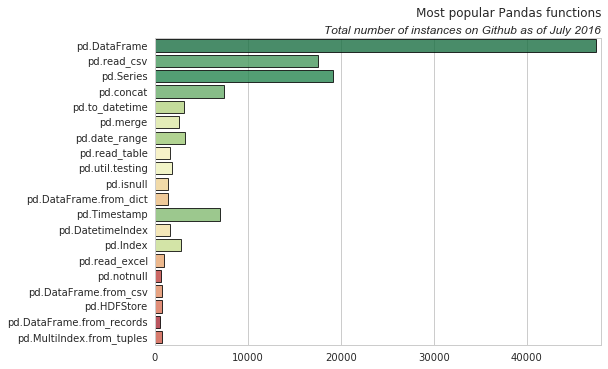

In [218]:
labels = ['pd.'+label for label in top_func_pd]
sns.barplot(x=counts_total_pd, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                       Most popular Pandas functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,48000)
plt.savefig('popular_pandas_functions.png', bbox_inches='tight', dpi=144)
plt.show()

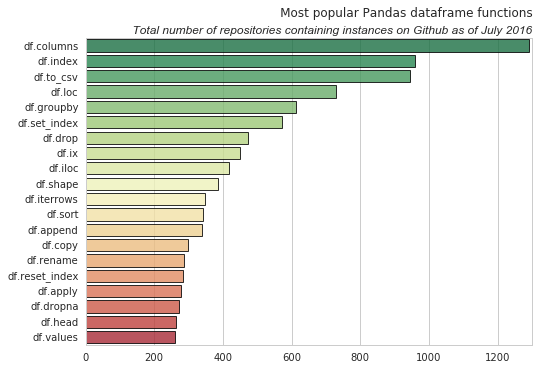

In [219]:
labels = ['df.'+label for label in top_func_pd_df]
sns.barplot(x=counts_distinct_pd_df, y=labels, palette=sns.color_palette('RdYlGn', 20)[::-1], alpha=0.8, lw=1)
plt.suptitle('                                                      Most popular Pandas dataframe functions', weight='bold')
plt.title('              Total number of repositories containing instances on Github as of July 2016', style='italic')
plt.xlim(0,1300)
plt.savefig('popular_pandas_df_functions.png', bbox_inches='tight', dpi=144)
plt.show()

In [220]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_np, counts_distinct_np)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

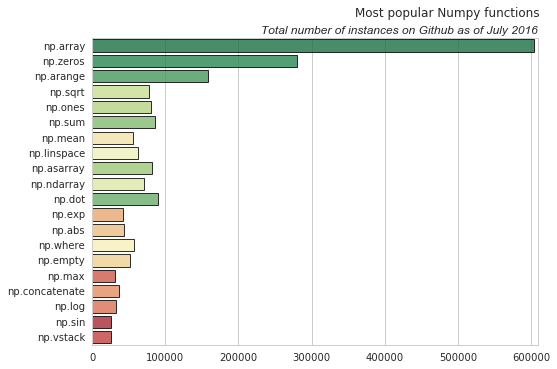

In [221]:
labels = ['np.'+label for label in top_func_np]
sns.barplot(x=counts_total_np, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                        Most popular Numpy functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,610000)
plt.savefig('popular_numpy_functions.png', bbox_inches='tight', dpi=144)
plt.show()

In [222]:
# Order according to the total number of instances
tups = sorted(list(zip(counts_total_sp, counts_distinct_sp)),
              key=lambda x: x[0])[::-1]
# Add indices
tups = list(zip([item[0] for item in tups],
                 [item[1] for item in tups],
                 np.arange(0,20,1)))
# Re-order according to number of repositories
order = [item[2] for item in sorted(tups, key=lambda x: x[1])[::-1]]
colors = sns.color_palette('RdYlGn', 20)[::-1]
colors = np.array(colors)[order]

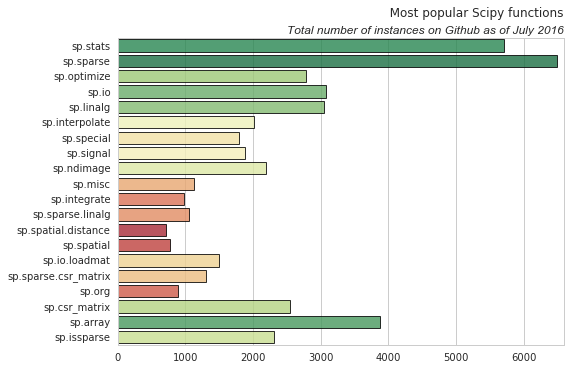

In [223]:
labels = ['sp.'+label for label in top_func_sp]
sns.barplot(x=counts_total_sp, y=labels, palette=colors, alpha=0.8, lw=1)
plt.suptitle('                                                                          Most popular Scipy functions', weight='bold')
plt.title('                                                  Total number of instances on Github as of July 2016', style='italic')
plt.xlim(0,6600)
plt.savefig('popular_scipy_functions.png', bbox_inches='tight', dpi=144)
plt.show()

### Top 10 `Pandas` functions

**1) DataFrame**

In [286]:
# Creates a dataframe object.
df = pd.DataFrame(data={'y': [1, 2, 3],
                       'score': [93.5, 89.4, 90.3],
                       'name': ['Dirac', 'Pauli', 'Bohr'],
                       'birthday': ['1902-08-08', '1900-04-25', '1885-10-07']})
print(type(df))
print(df.dtypes)
df

<class 'pandas.core.frame.DataFrame'>
birthday     object
name         object
score       float64
y             int64
dtype: object


,birthday,name,score,y
0,1902-08-08,Dirac,93.5,1
1,1900-04-25,Pauli,89.4,2
2,1885-10-07,Bohr,90.3,3


**2) read_csv**

In [230]:
# Creates a dataframe object from .csv file.
df = pd.read_csv(filepath_or_buffer='file_name.csv')

**3) Series**

In [320]:
# Creates a series object.
# A series is also returned if accesing a single dataframe column
# i.e. df.col_name
items = pd.Series(data=[93.5, 89.4, 90.3], name='score')
print(type(items))
items

<class 'pandas.core.series.Series'>


0    93.5
1    89.4
2    90.3
Name: score, dtype: float64

**4) concat**

In [321]:
# Merge Series, DataFrame, or Panel objects.
items2 = pd.Series(data=['1902-08-08', '1900-04-25'], name='birthday')

print('merged items along index axes:')
print(pd.concat(objs=[items, items2], axis=0))
print('')
print('merged items along column axes:')
print(pd.concat(objs=[items, items2], axis=1))

merged items along index axes:
0          93.5
1          89.4
2          90.3
0    1902-08-08
1    1900-04-25
dtype: object

merged items along column axes:
   score    birthday
0   93.5  1902-08-08
1   89.4  1900-04-25
2   90.3         NaN


**5) to_datetime**

In [285]:
# Convert argument to datetime.
pd.to_datetime(arg=df.birthday, format='%Y-%m-%d')

0   1902-08-08
1   1900-04-25
2   1885-10-07
Name: birthday, dtype: datetime64[ns]

**6) merge**

In [373]:
df_new = pd.DataFrame(data=list(zip(['Dirac', 'Pauli', 'Bohr', 'Einstein'],
                                    [True, False, True, True])),
                      columns=['name', 'friendly'])

df_merge = pd.merge(left=df, right=df_new, on='name', how='outer')
df_merge

,birthday,name,score,y,friendly
0,1902-08-08,Dirac,93.5,1.0,True
1,1900-04-25,Pauli,89.4,2.0,False
2,1885-10-07,Bohr,90.3,3.0,True
3,NaN,Einstein,NaN,NaN,True


**7) date_range**

In [349]:
# Generates a set of datetimes with given period
# or frequency (as seen here). freq='M' -> monthly
# Can set freq to e.g., 'D', '7H', etc

pd.date_range(start=df.birthday[2], end=df.birthday[0],
              freq='M')

DatetimeIndex(['1885-10-31', '1885-11-30', '1885-12-31', '1886-01-31',
               '1886-02-28', '1886-03-31', '1886-04-30', '1886-05-31',
               '1886-06-30', '1886-07-31',
               ...
               '1901-10-31', '1901-11-30', '1901-12-31', '1902-01-31',
               '1902-02-28', '1902-03-31', '1902-04-30', '1902-05-31',
               '1902-06-30', '1902-07-31'],
              dtype='datetime64[ns]', length=202, freq='M')

**8) read_table**

In [ ]:
# Read in a general delimited file into DaraFrame
# Takes in parameter sep e.g., 
# tab separated -> sep='    '
# dash separated -> sep='-'
# It can also be left blank and automatically set

df = pd.read_table(filepath_or_buffer='data.file')

**9) util.testing**

In [370]:
# There is a whole lot of functions inside
# this module. A one seems to be
#
# pd.util.testing.assert_frame_equal 
#
# It will raise an Error (stop the program) and
# print the percentage difference between the dataframes

dfa = pd.DataFrame({'a': [1.0, 2.0],
                    'b': ['apple', 'cat']})

dfb = pd.DataFrame({'a': [1.0, 2.0],
                    'b': ['apple', 'dog']})

pd.util.testing.assert_frame_equal(dfa, dfb)

AssertionError: DataFrame.iloc[:, 1] are different

DataFrame.iloc[:, 1] values are different (50.0 %)
[left]:  [apple, cat]
[right]: [apple, dog]

**10) isnull **

In [380]:
# Returns a True/False mask the same
# shape as the input array 

test_list = [[None, 1, 2, 3, 4], [None, 1, None, 3, None]]
print(pd.isnull(test_list))

pd.isnull(df_merge)

[[ True False False False False]
 [ True False  True False  True]]


,birthday,name,score,y,friendly
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,True,False,True,True,False
